In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt#visualization
import seaborn as sns#visualization
import matplotlib.image as mpimg
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:/Ballebazi/User_Contest_Info123.csv')

In [3]:
df.head()

,user_id,cash_applied,bonus_applied,credits_won,date_added
0,1761072,0.0,0.0,0.0,21-12-2019 14:22
1,1761072,0.0,0.0,0.0,21-12-2019 14:22
2,1567059,29.0,0.0,0.0,21-12-2019 14:22
3,1761072,0.0,0.0,0.0,21-12-2019 14:22
4,2439797,49.0,0.0,0.0,21-12-2019 14:21


In [4]:
df.shape

(660095, 5)

In [5]:
def unique_counts(df):
   for i in df.columns:
       count = df[i].nunique()
       print(i, ": ", count)
unique_counts(df)

user_id :  34005
cash_applied :  1887
bonus_applied :  510
credits_won :  501
date_added :  31520


In [10]:
df.isnull().sum()

user_id          0
cash_applied     0
bonus_applied    0
credits_won      0
date_added       0
dtype: int64

In [6]:
#Customer distribution by credits won
df_cust_credits_won = df[['user_id','credits_won']].drop_duplicates()


In [7]:
df_cust_credits_won.head()

,user_id,credits_won
0,1761072,0.0
2,1567059,0.0
4,2439797,0.0
7,1738507,0.0
8,2106517,0.0


In [8]:
df_cust_credits_won.tail()

,user_id,credits_won
660075,1563002,0.0
660081,1596926,0.0
660089,1519851,0.0
660091,1466220,0.0
660094,1609995,0.0


In [9]:
df_cust_credits_won.shape

(105368, 2)

In [67]:
df_cust_revenue_won.groupby(['credits_won'])['user_id'].aggregate('count').reset_index().sort_values('credits_won', ascending=False)

,credits_won,user_id
500,68800.00,3
499,34400.00,1
498,20640.00,1
497,17200.00,1
496,10320.00,1
495,10000.00,92
494,8200.00,1
493,8100.00,1
492,7500.00,3
491,7200.00,1


In [68]:
df.isnull().sum()

user_id          0
cash_applied     0
bonus_applied    0
credits_won      0
date_added       0
dtype: int64

In [69]:
df.dtypes

user_id            int64
cash_applied     float64
bonus_applied    float64
credits_won      float64
date_added        object
dtype: object

In [70]:
df.cash_applied.max()

5599.0

In [71]:
df.bonus_applied.max()

279.95

In [72]:
df.credits_won.max()

68800.0

In [73]:
df.date_added.max()

'31-08-2019 11:44'

In [74]:
df.date_added.min()

'01-12-2019 01:31'

In [75]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2019-12-21 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2019,12,21)
df['date_added'] = pd.to_datetime(df['date_added'])

#Create RFM Modelling scores for each customer
RFMScores = df.groupby('user_id').agg({'date_added': lambda x: (Latest_Date - x.max()).days, 'user_id': lambda x: len(x), 'credits_won': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['date_added'] = RFMScores['date_added'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'date_added': 'Recency', 
                         'user_id': 'Frequency', 
                         'credits_won': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,user_id,Recency,Frequency,Monetary
0,1441841,161,4,0.0
1,1441863,7,1,0.0
2,1441882,126,1,0.0
3,1441943,-1,12,50.0
4,1442022,85,1,0.0


In [86]:
RFMScores.shape

(34005, 3)

In [81]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    34005.000000
mean        36.418615
std         55.507103
min         -1.000000
25%          0.000000
50%          5.000000
75%         69.000000
max        342.000000
Name: Recency, dtype: float64

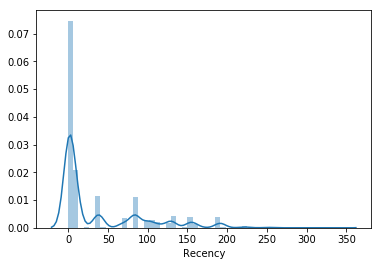

In [82]:
#Recency distribution plot
import seaborn as sns
x = RFMScores['Recency']

ax = sns.distplot(x)

In [83]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    34005.000000
mean        19.411704
std         60.383212
min          1.000000
25%          2.000000
50%          5.000000
75%         16.000000
max       3001.000000
Name: Frequency, dtype: float64

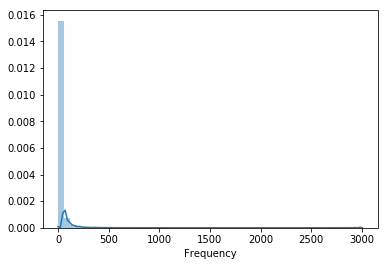

In [84]:
x = RFMScores['Frequency']

ax = sns.distplot(x)

In [88]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [89]:
quantiles

{'Recency': {0.25: 0.0, 0.5: 5.0, 0.75: 69.0},
 'Frequency': {0.25: 2.0, 0.5: 5.0, 0.75: 16.0},
 'Monetary': {0.25: 0.0, 0.5: 3.0, 0.75: 87.0}}

In [90]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [91]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
user_id,,,,,,
1441841,161,4,0.0,4,3,4
1441863,7,1,0.0,3,4,4
1441882,126,1,0.0,4,4,4
1441943,-1,12,50.0,1,2,2
1442022,85,1,0.0,4,4,4


In [92]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
user_id,,,,,,,,
1441841,161,4,0.0,4,3,4,434,11
1441863,7,1,0.0,3,4,4,344,11
1441882,126,1,0.0,4,4,4,444,12
1441943,-1,12,50.0,1,2,2,122,5
1442022,85,1,0.0,4,4,4,444,12


In [93]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,user_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,1441841,161,4,0.0,4,3,4,434,11,Silver
1,1441863,7,1,0.0,3,4,4,344,11,Silver
2,1441882,126,1,0.0,4,4,4,444,12,Bronze
3,1441943,-1,12,50.0,1,2,2,122,5,Platinum
4,1442022,85,1,0.0,4,4,4,444,12,Bronze


In [94]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,user_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,2000381,-1,88,280120.00,1,1,1,111,3,Platinum
1,2452964,-1,133,267339.00,1,1,1,111,3,Platinum
2,1864468,-1,81,243550.00,1,1,1,111,3,Platinum
3,1829199,-1,88,240000.00,1,1,1,111,3,Platinum
4,1841747,-1,131,195050.00,1,1,1,111,3,Platinum
5,2194580,-1,149,180587.33,1,1,1,111,3,Platinum
6,1453596,-1,81,146740.00,1,1,1,111,3,Platinum
7,2451945,-1,79,135500.00,1,1,1,111,3,Platinum
8,2435214,-1,213,126033.33,1,1,1,111,3,Platinum
9,2445710,-1,136,124912.00,1,1,1,111,3,Platinum


In [102]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
user_id,,,,,,,,,
1441841,161,4,1.0,4,3,4,434,11,Silver
1441863,7,1,1.0,3,4,4,344,11,Silver
1441882,126,1,1.0,4,4,4,444,12,Bronze
1441943,1,12,50.0,1,2,2,122,5,Platinum
1442022,85,1,1.0,4,4,4,444,12,Bronze


In [96]:

#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [101]:
Log_Tfd_Data.head()

,Recency,Frequency,Monetary
user_id,,,
1441841,5.081,1.386,0.000
1441863,1.946,0.000,0.000
1441882,4.836,0.000,0.000
1441943,0.000,2.485,3.912
1442022,4.443,0.000,0.000


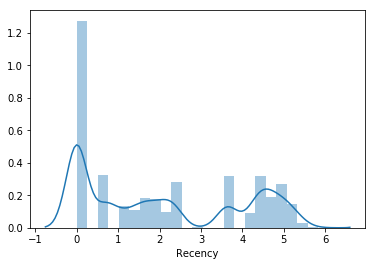

In [97]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)


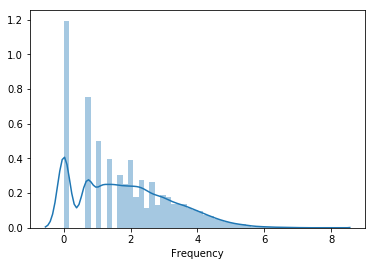

In [98]:

#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data['Frequency']
ax = sns.distplot(Frequency_Plot)

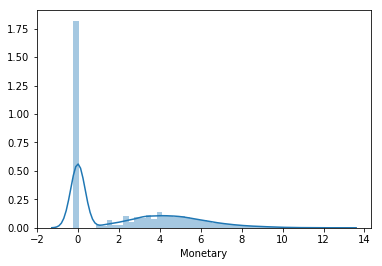

In [99]:

#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [100]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

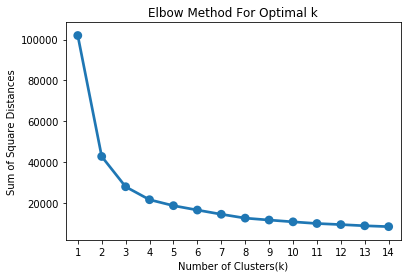

In [103]:

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [104]:

#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
user_id,,,,,,,,,,
1441841,161,4,1.0,4,3,4,434,11,Silver,0
1441863,7,1,1.0,3,4,4,344,11,Silver,2
1441882,126,1,1.0,4,4,4,444,12,Bronze,0
1441943,1,12,50.0,1,2,2,122,5,Platinum,1
1442022,85,1,1.0,4,4,4,444,12,Bronze,0


<Figure size 504x504 with 0 Axes>

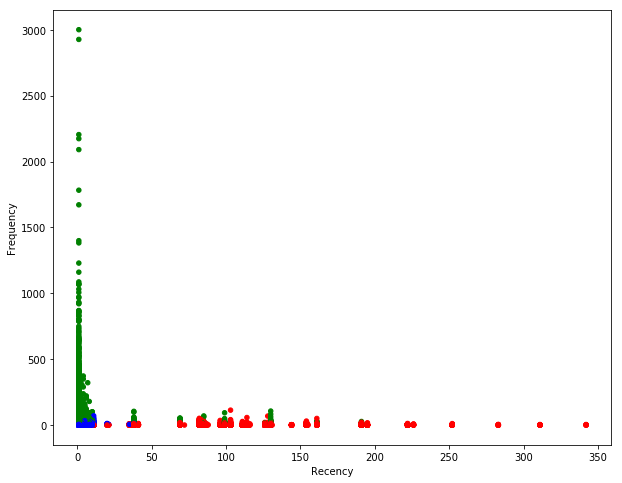

In [106]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFMScores['Color']
)

In [107]:

RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
user_id,,,,,,,,,,,
1441841,161,4,1.0,4,3,4,434,11,Silver,0,red
1441863,7,1,1.0,3,4,4,344,11,Silver,2,blue
1441882,126,1,1.0,4,4,4,444,12,Bronze,0,red
1441943,1,12,50.0,1,2,2,122,5,Platinum,1,green
1442022,85,1,1.0,4,4,4,444,12,Bronze,0,red


In [108]:
df.head()

,user_id,cash_applied,bonus_applied,credits_won,date_added
0,1761072,0.0,0.0,0.0,2019-12-21 14:22:00
1,1761072,0.0,0.0,0.0,2019-12-21 14:22:00
2,1567059,29.0,0.0,0.0,2019-12-21 14:22:00
3,1761072,0.0,0.0,0.0,2019-12-21 14:22:00
4,2439797,49.0,0.0,0.0,2019-12-21 14:21:00


In [109]:
#Remove time from date
df['date_added'] = pd.to_datetime(df['date_added'], format="%m/%d/%Y %H:%M").dt.date

In [110]:
df.head()

,user_id,cash_applied,bonus_applied,credits_won,date_added
0,1761072,0.0,0.0,0.0,2019-12-21
1,1761072,0.0,0.0,0.0,2019-12-21
2,1567059,29.0,0.0,0.0,2019-12-21
3,1761072,0.0,0.0,0.0,2019-12-21
4,2439797,49.0,0.0,0.0,2019-12-21


In [120]:
tx_data = df[['user_id', 'date_added', 'credits_won']]

In [122]:
tx_data.head()

,user_id,date_added,credits_won
0,1761072,2019-12-21,0.0
1,1761072,2019-12-21,0.0
2,1567059,2019-12-21,0.0
3,1761072,2019-12-21,0.0
4,2439797,2019-12-21,0.0


In [125]:

#Print records pertaining unique Customer IDs
print(tx_data['user_id'].nunique())

34005


In [126]:

#Check the Last order date
last_order_date = tx_data['user_id'].max()
print(last_order_date)
print("--------------------------------------")
print(tx_data[(tx_data['user_id']==2000381)])

2550089
--------------------------------------
        user_id  date_added  credits_won
9727    2000381  2019-12-21          0.0
12884   2000381  2019-12-21          0.0
18365   2000381  2019-12-21      10000.0
25528   2000381  2019-12-21          0.0
42023   2000381  2019-12-20       5000.0
43875   2000381  2019-12-20          0.0
45960   2000381  2019-12-20          0.0
51629   2000381  2019-12-20          0.0
55257   2000381  2019-12-20          0.0
58898   2000381  2019-12-20      10000.0
65401   2000381  2019-12-20          0.0
70841   2000381  2019-12-20          0.0
71401   2000381  2019-12-20      10000.0
86089   2000381  2019-12-19          0.0
86094   2000381  2019-12-19          0.0
86306   2000381  2019-12-19          0.0
88943   2000381  2019-12-19          0.0
96041   2000381  2019-12-19      10000.0
108941  2000381  2019-12-19          0.0
116576  2000381  2019-12-19          0.0
116655  2000381  2019-12-19          0.0
123119  2000381  2019-12-18          0.0
132131  20

In [129]:
from lifetimes.plotting import *
from lifetimes.utils import *
#Built-in utility functions from lifetimes package to transform the transactional data (one row per purchase) 
#into summary data (a frequency, recency, age and monetary).

lf_tx_data = summary_data_from_transaction_data(tx_data, 'user_id', 'date_added', monetary_value_col='credits_won', observation_period_end='2019-12-21')
lf_tx_data.reset_index().head()

,user_id,frequency,recency,T,monetary_value
0,1441841,2.0,61.0,223.0,0.0
1,1441863,0.0,0.0,8.0,0.0
2,1441882,0.0,0.0,127.0,0.0
3,1441943,4.0,131.0,131.0,12.5
4,1442022,0.0,0.0,86.0,0.0


count    34005.000000
mean         3.446081
std          4.336084
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max         29.000000
Name: frequency, dtype: float64
---------------------------------------
Percentage of customers take part in contest only once: 30.91 %


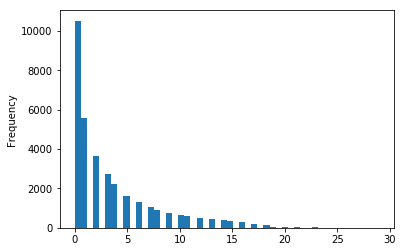

In [131]:

%matplotlib inline
#Create histogram to find out how many customers purchased item only once.
lf_tx_data['frequency'].plot(kind='hist', bins=50)
print(lf_tx_data['frequency'].describe())
print("---------------------------------------")
one_time_buyers = round(sum(lf_tx_data['frequency'] == 0)/float(len(lf_tx_data))*(100),2)
print("Percentage of customers take part in contest only once:", one_time_buyers ,"%")

In [138]:
#Frequency/Recency Analysis Using the BG/NBD Model
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=1.0)
bgf.fit(lf_tx_data['frequency'], lf_tx_data['recency'], lf_tx_data['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 34005 subjects, a: 0.00, alpha: 5.88, b: 0.00, r: 0.29>


In [139]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.294144,0.002089,0.290050,0.298238
alpha,5.882283,0.091418,5.703105,6.061461
a,0.000011,0.000025,-0.000037,0.000060
b,0.001813,0.003814,-0.005662,0.009289


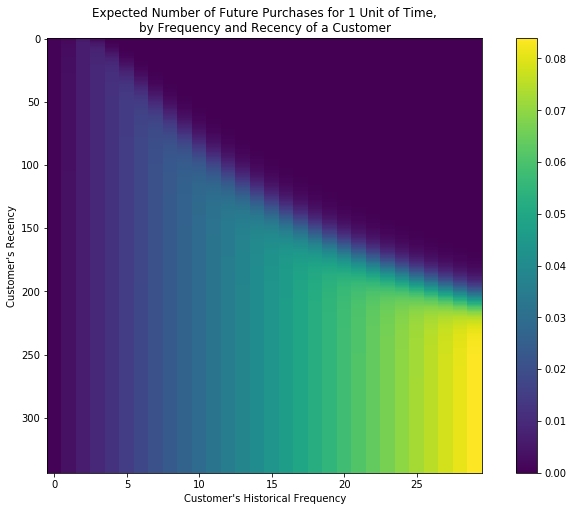

In [140]:
#Visualizing our frequency/recency matrix
%matplotlib inline
import matplotlib.pyplot as plt
from lifetimes.plotting import plot_frequency_recency_matrix
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

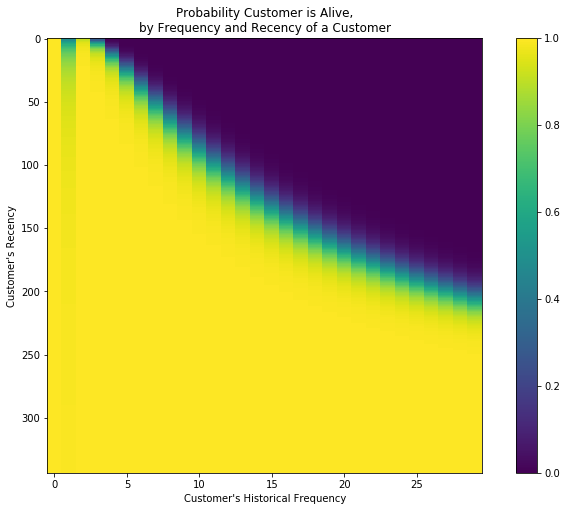

In [141]:
#predict if the customers are surely alive:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [142]:
#Predict future transaction in next 10 days i.e.top 10 customers that the model expects them to make purchases 
#in the next 10 days, based on historical data

t = 10
lf_tx_data['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, lf_tx_data['frequency'], lf_tx_data['recency'], lf_tx_data['T']),2)
lf_tx_data.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

,user_id,frequency,recency,T,monetary_value,pred_num_txn
0,2510553,9.0,9.0,9.0,571.141111,6.25
1,2507397,9.0,9.0,9.0,1.222222,6.25
2,2057324,9.0,9.0,9.0,9.333333,6.25
3,2509934,9.0,9.0,9.0,76.555556,6.25
4,2508760,9.0,9.0,9.0,408.555556,6.25
5,2490812,9.0,9.0,9.0,100.000000,6.25
6,2448782,9.0,9.0,9.0,1141.111111,6.25
7,2508573,9.0,9.0,9.0,23.111111,6.25
8,2480315,9.0,9.0,9.0,127.555556,6.25
9,1795703,9.0,9.0,9.0,31.000000,6.25


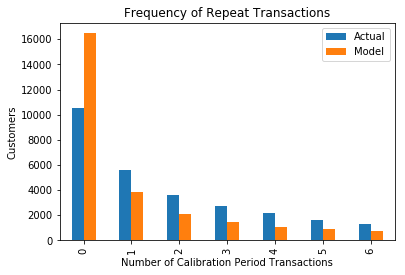

In [143]:
#Assessing model fit
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [145]:
#Customer's future transaction prediction for next 10 days

t = 10
individual = lf_tx_data.loc[2000381]
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

#OBSERVATION: Our model predicts that customer 14911’s future transaction is appx 3 in 10 days.

0.7728901466216904

In [146]:
#Check if there is correlation between monetary value and frequency in order to use gamma gamma model for CLV calculation.
lf_tx_data[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.178645
frequency,0.178645,1.000000


In [147]:

#Shortlist customers who had at least one repeat purchase with the company. 
shortlisted_customers = lf_tx_data[lf_tx_data['frequency']>0]
print(shortlisted_customers.head().reset_index())
print("-----------------------------------------")
print("The Number of Returning Customers are: ",len(shortlisted_customers))

   user_id  frequency  recency      T  monetary_value  pred_num_txn
0  1441841        2.0     61.0  223.0        0.000000          0.10
1  1441943        4.0    131.0  131.0       12.500000          0.31
2  1442116       15.0    192.0  192.0       12.266667          0.77
3  1442148        3.0    247.0  253.0        0.000000          0.13
4  1442151        4.0    115.0  127.0        0.000000          0.32
-----------------------------------------
The Number of Returning Customers are:  23495


In [157]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(shortlisted_customers['frequency'],
        shortlisted_customers['monetary_value'])
print(ggf)

ValueError: There exist non-positive values in the monetary_value vector.